In [273]:
#Loading the data
import numpy as np
import pandas as pd
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


**Part 1: Data Understanding**

In [274]:
# Getting a quick glimpse of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [275]:
# Finding the total number of columns and entries as well as the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The above output shows:


*   Total number of columns/features:81 columns
*   Total number of entries:1460 entries
*   Data types:The dataset includes various data types, i.e float, integer, and string (object) types.






In [276]:
#Finding the total number of missing rows in each column
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [277]:
#From the above we can find the percent of missing data in each column
(df.isna().sum()/len(df))*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [278]:
# overview of Statistical information for all the columns
df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Cardinality of continuous and categorical vatiables using nunique()

In [279]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

Based on the results of the cardinality, the columns OverallQual and OverallCond are categorical features instead of numerical features since they use numbers 1-10 to rate the quality and condition of the house.

**Univariate** **analysis**

In [280]:
#selecting only the numeric columns in dataframe 
df1 = df.select_dtypes(include=np.number)
#we drop OverallQuall and OverallCond from the dataframe of numeric columns because even though they're numbers but they're in fact categorical features.
df1 = df1.drop(["OverallQual", "OverallCond"], axis=1)
df1

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [281]:
#Using describe method to get the descriptive statistics of continuous variables
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The describe method provides the count, mean,standard deviation, range, 25th percentile, 50th percentile, and 75th percentile of each of the continuous features.

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

Using histograms to see the distribution of certain continuous features

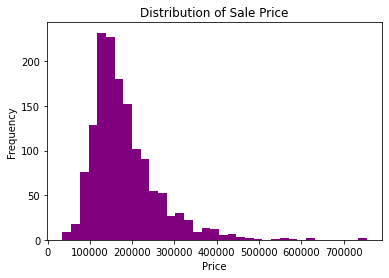

In [283]:
#the distribution of sale price
plt.hist(df1.SalePrice, bins=35, color="purple")
plt.ylabel("Frequency")
plt.xlabel ("Price")
plt.title("Distribution of Sale Price")
plt.show()

The histogram shows that sale price follows a right skewed unimodal distribution indicating that the price of most houses is around 163000-210000, but there are some few houses that have a higher price range.

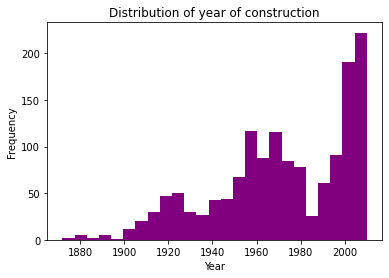

In [284]:
#The distribution of year built
plt.hist(df1.YearBuilt, bins=25, color="purple")
plt.ylabel("Frequency")
plt.xlabel ("Year")
plt.title("Distribution of year of construction")
plt.show()

The distribution doesn't follow a normal distribution. Rather, the histogram reveals that many houses were built beginning from the 1960s onwards with a high number of the houses being built after the year 2000. 

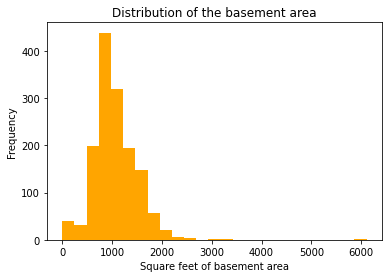

In [285]:
#Histogram for size of basement area
plt.hist(df1.TotalBsmtSF, bins=25, color="orange")
plt.xlabel("Square feet of basement area")
plt.ylabel("Frequency")
plt.title("Distribution of the basement area")
plt.show()

The histogram follows a right skewed unimodal distribution, which indicates that most the size of the basements of most houses is within the 1000 square feet range. However, there are a few number of houses whose basements are more than the size that many houses typically have and there is an outlier that has 6000 sq ft as the basement area.

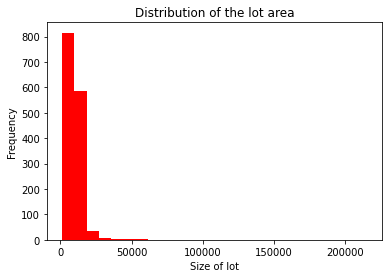

In [286]:
plt.hist(df1.LotArea, bins=25, color="red")
plt.xlabel("Size of lot")
plt.ylabel("Frequency")
plt.title("Distribution of the lot area")
plt.show()

The distribution appears to be exponential

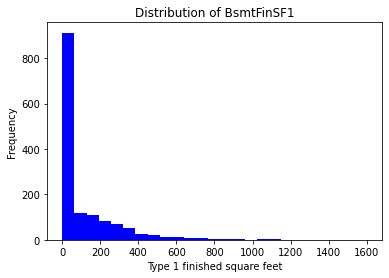

In [384]:
#distribution of BsmtFinSF1
plt.hist(df1.MasVnrArea, bins=25, color="blue")
plt.xlabel("Type 1 finished square feet")
plt.ylabel("Frequency")
plt.title("Distribution of BsmtFinSF1")
plt.show()
#the distribution appears to be exponential as well.

Using boxplot to visualize certain continuous features

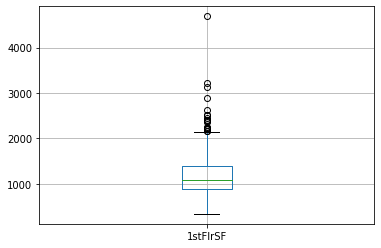

In [287]:
df1.boxplot(column="1stFlrSF")
#appears to be one outlier

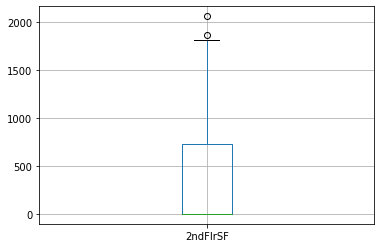

In [288]:
df1.boxplot(column="2ndFlrSF")
#no outliers

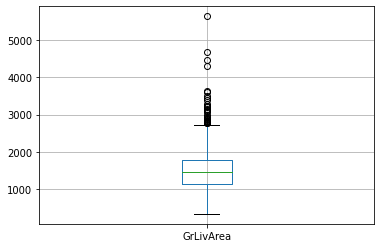

In [289]:
df1.boxplot(column="GrLivArea")
#one outlier that's above 5000

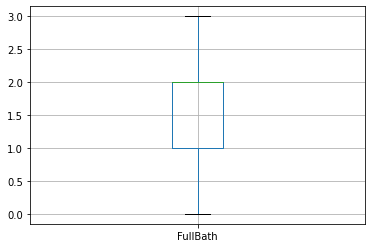

In [290]:
df1.boxplot(column="FullBath")
#no outliers

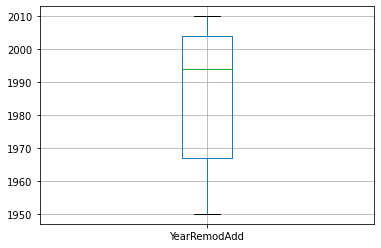

In [381]:
df1.boxplot(column="YearRemodAdd")
#there are no outliers

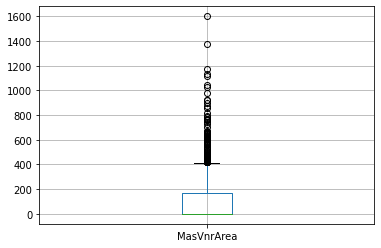

In [383]:
df1.boxplot(column="MasVnrArea")
#there are 2 outliers with 1400 and 1600 square feet

Univariate analysis of categorical variables

In [291]:
#creating dataframe for only categorical variables
df2 = df.select_dtypes(include="object")
#Adding OverallQual and OverallCond columns to dataframe for categorical features
df2.loc[:, "OverallQual"] = df.OverallQual
df2.loc[:, "OverallCond"] = df.OverallCond
df2


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,OverallQual,OverallCond
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,7,5
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,6,8
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,7,5
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,7,5
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,6,5
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,6,6
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,7,9
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5,6


In [292]:
df2.isna().sum()/len(df2)*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [293]:
df2.nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
OverallQual      10
OverallCond       9
dtype: int64

In [294]:
#Finding the mode of each of the categorical features
df2.mode()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,OverallQual,OverallCond
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,5,5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar plot for building type')

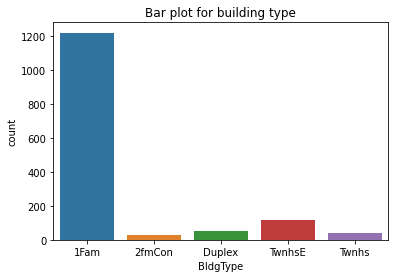

In [295]:
#Bar plot for building type
sns.countplot(df2.BldgType)
plt.title("Bar plot for building type")




The bar plot reveals that most houses are single-family detached houses followed by townhouse end unit

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


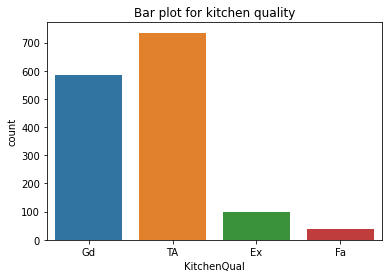

In [296]:
# bar plot for kitchen quality
sns.countplot(df2.KitchenQual)
plt.title("Bar plot for kitchen quality")
plt.show()

Based on the bar plot, most of the kitchens found in the homes have typical/average quality, while the least number of homes have fair quality kitchens.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


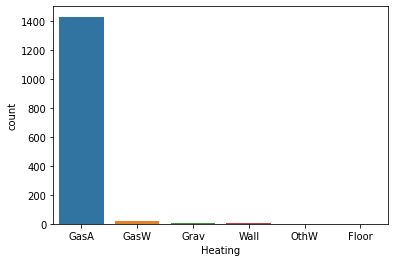

In [297]:
#Bar plot for heating
sns.countplot(df2.Heating)
#Most houses seem to have GasA as the type of heating

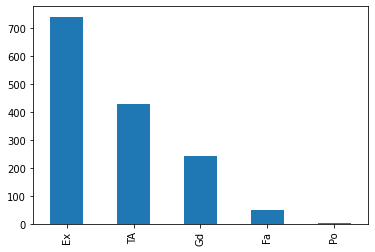

In [298]:
#Bar plot for HeatingQC
df2['HeatingQC'].value_counts().plot(kind='bar')
plt.show()
#very few houses have poor heating quality and condition, while majority have excellent

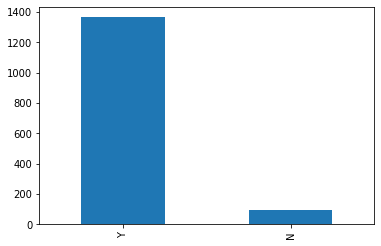

In [299]:
df2["CentralAir"].value_counts().plot(kind='bar')
plt.show()
#Majority of the houses have central air

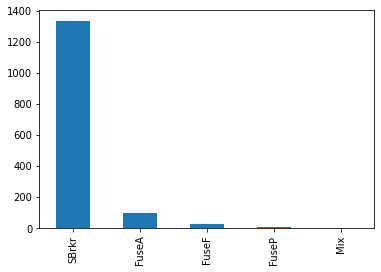

In [300]:
df2['Electrical'].value_counts().plot(kind='bar')
plt.show()
#Electrical system in many houses is SBrkr and no houses have a mix

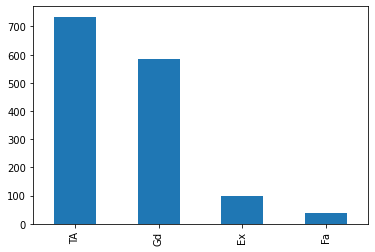

In [301]:
df2['KitchenQual'].value_counts().plot(kind='bar')
plt.show()
#Majority of the houses have TA kitchen quality

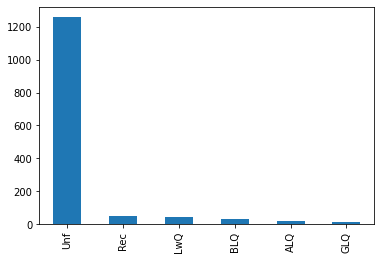

In [385]:
df2['BsmtFinType2'].value_counts().plot(kind='bar')
plt.show()
#Most of the houses have Unf

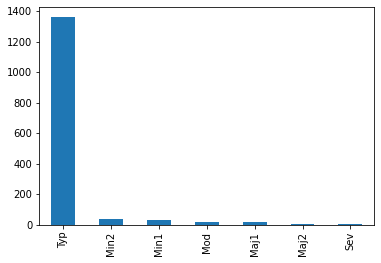

In [386]:
df2['Functional'].value_counts().plot(kind='bar')
plt.show()
#Typ is the most frequenty functionality in homes

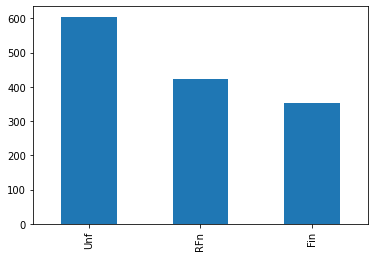

In [387]:
df2['GarageFinish'].value_counts().plot(kind='bar')
plt.show()
#The unf is most frequent followed by RFn and finally Fin. so less homes have their garages finished.

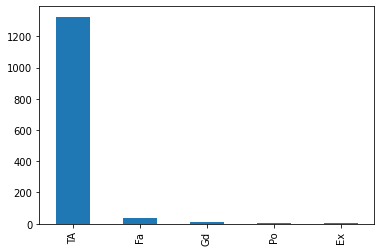

In [388]:
df2['GarageCond'].value_counts().plot(kind='bar')
plt.show()
#Most homes have TA as the condition of their garage, while the least amount of homes have an excellent garage

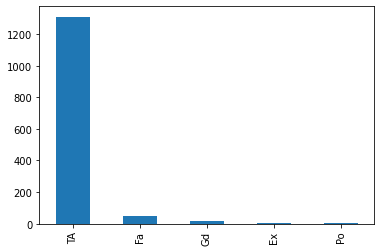

In [391]:
df2['GarageQual'].value_counts().plot(kind='bar')
plt.show()
#The quality of most garages is TA, while the least amount of garagaes have poor quality.

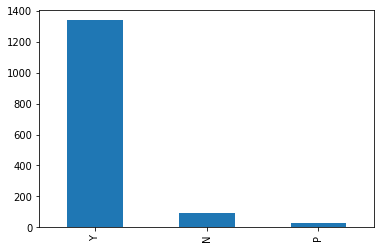

In [389]:
df2['PavedDrive'].value_counts().plot(kind='bar')
plt.show()
#Most homes have a paved driveway

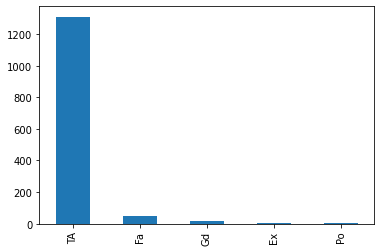

In [390]:
df2['GarageQual'].value_counts().plot(kind='bar')
plt.show()

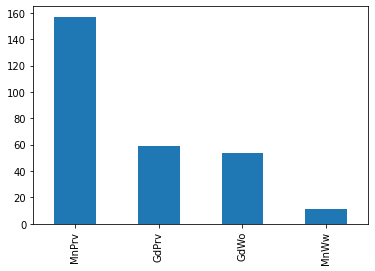

In [392]:
df2['Fence'].value_counts().plot(kind='bar')
plt.show()
#MnWw fence type is the one that's most frequently observed across several homes.

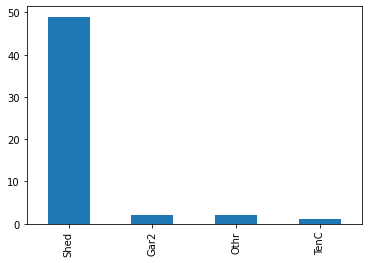

In [395]:
df2['MiscFeature'].value_counts().plot(kind='bar')
plt.show()
#the most common miscellaneous feature is shed, while the least common is tennis court (TenC)

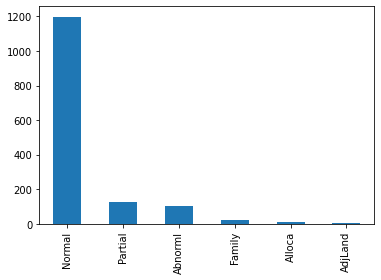

In [393]:
df2['SaleCondition'].value_counts().plot(kind='bar')
plt.show()
#Most homes are sold at a normal sale

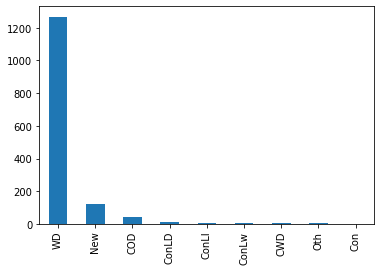

In [394]:
df2['SaleType'].value_counts().plot(kind='bar')
plt.show()
#Most homes are sold WD, while there are no homes sold using Contract

**Bivariate analysis**

In [302]:
#Finding correlation among the features using a correlation matrix
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


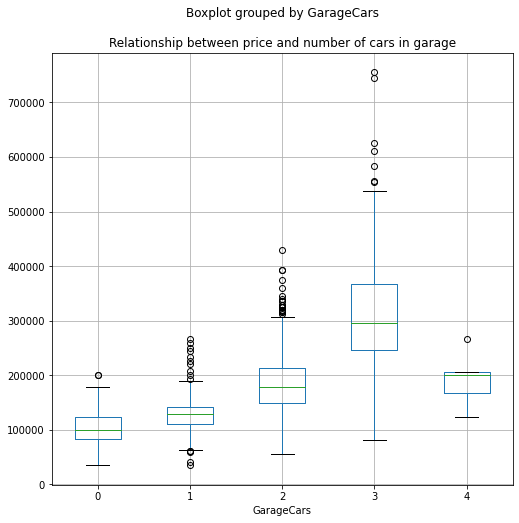

In [303]:
#Visualizing relationship between garage cars and sale price
df.boxplot(column="SalePrice",    
                 by= "GarageCars",    
                 figsize= (8,8)) 
plt.title("Relationship between price and number of cars in garage")
plt.show()
#The boxplots indicate that there's a relationship between the two features since the boxplots don't overlap significantly.

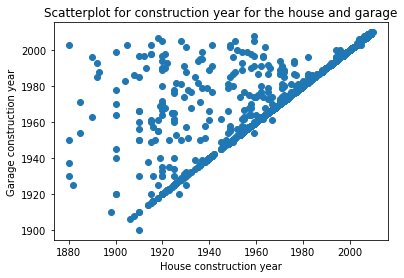

In [304]:
#visualizing relationship between year built and garage year built
plt.scatter(df1.YearBuilt, df1.GarageYrBlt)
plt.title("Scatterplot for construction year for the house and garage")
plt.xlabel("House construction year")
plt.ylabel("Garage construction year")
plt.show()
#Overall, the scatterplot shows a positive linear relationship for many points even though there are a number of data points that don't exhibit that relationship.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


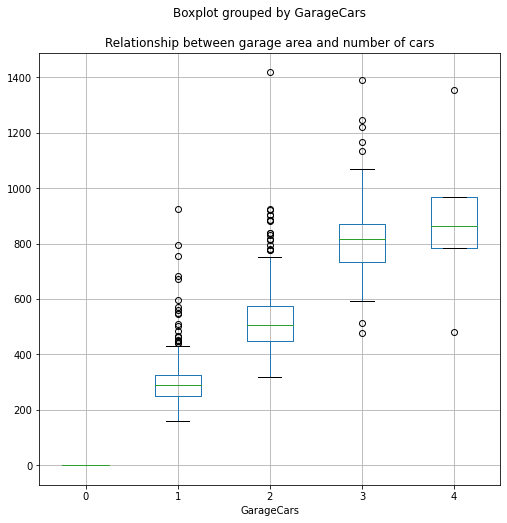

In [305]:
df.boxplot(column="GarageArea",    
                 by= "GarageCars",    
                 figsize= (8,8)) 
plt.title("Relationship between garage area and number of cars")
plt.show()
#There seems to be a relationship between the two features since overall, there's little overlap among the boxplots.

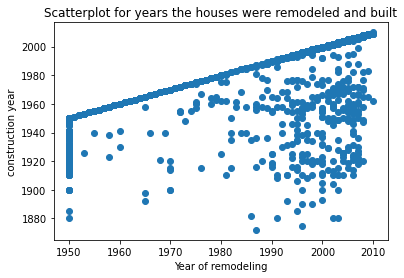

In [306]:
#visualizing relationship between year built and garage year built
plt.scatter(df1.YearRemodAdd, df1.YearBuilt)
plt.title("Scatterplot for years the houses were remodeled and built")
plt.xlabel("Year of remodeling")
plt.ylabel("construction year")
plt.show()
#Overall, most of the datapoints demonstrate a positive linear relationship but there are some data points that are scattered around the plot that don't exhibit this relationship.

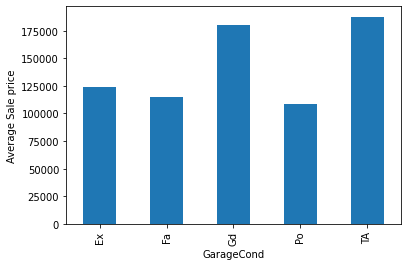

In [307]:
#relationship between sale price and garage condition
df.groupby('GarageCond')['SalePrice'].mean().plot(kind='bar')
plt.ylabel('Average Sale price')
plt.show()

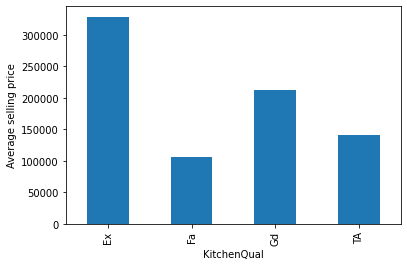

In [308]:
#relationship between sale price and KitchenQual
df.groupby('KitchenQual')['SalePrice'].mean().plot(kind='bar')
plt.ylabel('Average selling price')
plt.show()

In [309]:
#visualizing relationship between external quality and external condition
#two-way table
df2_group = df2.groupby(["ExterQual","ExterCond"])
df2_group.size()


ExterQual  ExterCond
Ex         Ex             1
           Gd             3
           TA            48
Fa         Fa             6
           TA             8
Gd         Gd            35
           TA           453
TA         Ex             2
           Fa            22
           Gd           108
           Po             1
           TA           773
dtype: int64

In [310]:
External_qual_table = pd.crosstab(index=df2["ExterQual"], 
                          columns=df2["ExterCond"])

External_qual_table


ExterCond,Ex,Fa,Gd,Po,TA
ExterQual,,,,,
Ex,1,0,3,0,48
Fa,0,6,0,0,8
Gd,0,0,35,0,453
TA,2,22,108,1,773


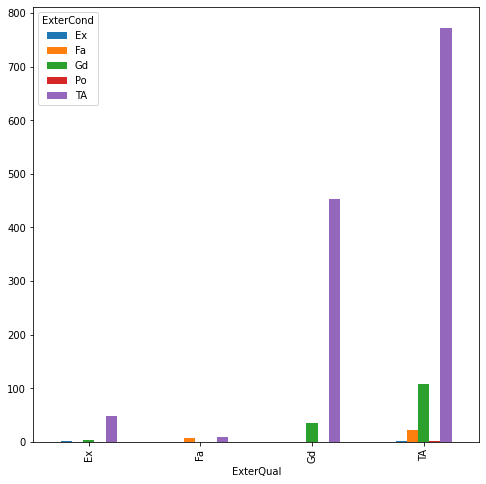

In [311]:
External_qual_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

<Figure size 1440x1080 with 0 Axes>

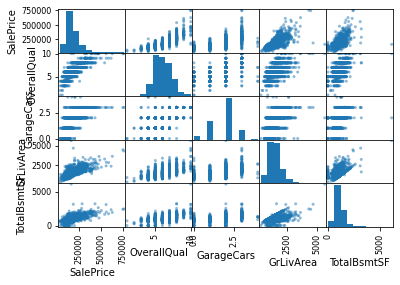

In [312]:
#scatterplot matrix for an overall bivariate analysis
plt.figure(figsize=(20,15))
df3 = df[["SalePrice", "OverallQual", "GarageCars", "GrLivArea", "TotalBsmtSF"]]
pd.plotting.scatter_matrix(df3)
plt.show()
#The scatterplot matrix shows the visual relationship among sale price and the features that have the highest correlation variable with sale price. Specifically, from the plot overall quality
#garage cars, the living area and size of basement exhibit a positive linear relationship with sale price. Similarly, overall quality and grliv area have a positive linear relationship. Grliv area also exhibits a positive linear relationship with totalbsmtsf.

Multivariate analysis

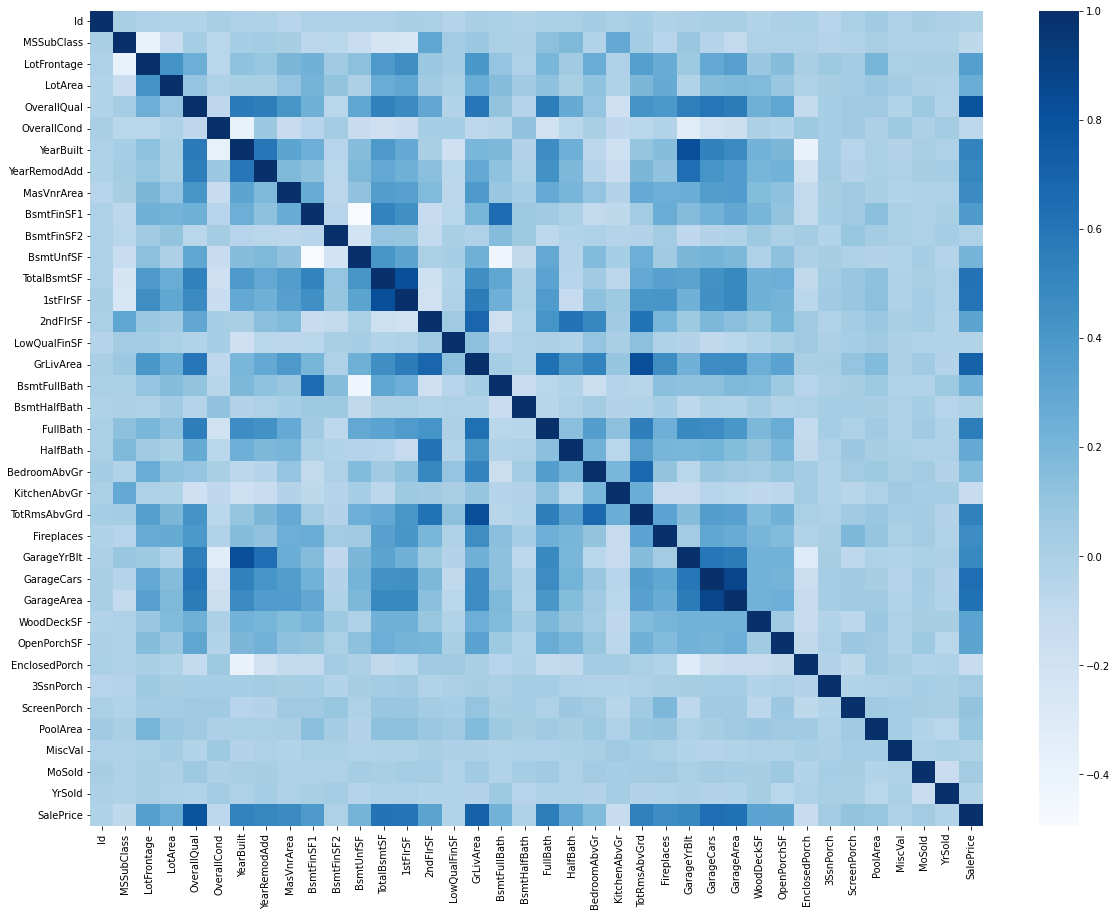

In [313]:
#using heatmap to visualize multivariate analysis
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='Blues')

<Figure size 1440x1080 with 0 Axes>

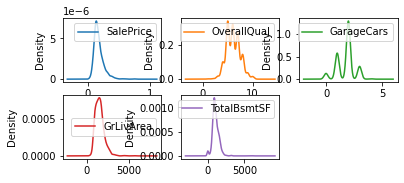

In [314]:
# Density plot for continuous variables that show high correlation with sale price
plt.figure(figsize=(20,15))
df3.plot(kind="density", subplots=True, layout=(3,3), sharex=False)
plt.show()

Data quality report for continuous features
		
				




In [315]:
report_cont = df1.describe().transpose()
report_cont["cardinality"] = df1.nunique()
report_cont["%Miss"] =(df1.isna().sum()/len(df1))*100
report_cont


,count,mean,std,min,25%,50%,75%,max,cardinality,%Miss
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0,1460,0.000000
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,15,0.000000
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,110,17.739726
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,1073,0.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,112,0.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,61,0.000000
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,327,0.547945
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,637,0.000000
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,144,0.000000
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0,780,0.000000


Data quality report for categorical features

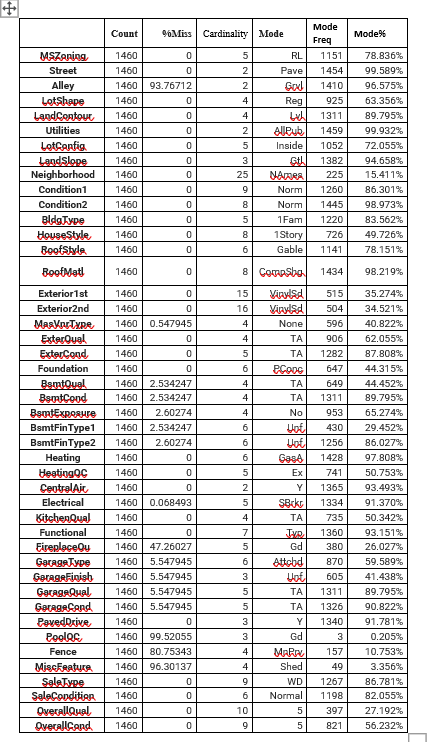

**Pre-Processing**

1. Handling missing values

In [316]:
#Finding percentage of missing values for each column
df.isna().sum()/len(df)*100 



Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [317]:
#Identifying the columns missing more than 60% of values
missing = (df.isna().sum()/len(df)*100)>60
miss60 = df.loc[: , missing]
miss60

,Alley,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1455,NaN,NaN,NaN,NaN
1456,NaN,NaN,MnPrv,NaN
1457,NaN,NaN,GdPrv,Shed
1458,NaN,NaN,NaN,NaN


In [318]:
#Removing features missing more than 60% of their values
percentage = 60.0
min_count =  int(((100-percentage)/100)*df.shape[0] + 1)
new_df = df.dropna( axis=1, 
                thresh=min_count)
new_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [319]:
#Using imputation for those features with less than 50% of missing values 
#Selecting continuous feaures from new_df to fill missing values with the mean
numeric = new_df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [320]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [321]:
#Filling missing values of continuous features with mean
new_df[numeric_columns] = new_df[numeric_columns].fillna(new_df.mean())

<ipython-input-321-99c83d8d3750>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df[numeric_columns] = new_df[numeric_columns].fillna(new_df.mean())
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [322]:
#Checking whether missing values in numeric columns have been removed
new_df.isna().sum()/len(new_df)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 77, dtype: float64

In [323]:
#Imputation for categorical columns
string_columns = new_df.select_dtypes(include=np.object).columns.tolist()
new_df[string_columns] = new_df[string_columns]
new_df[string_columns].fillna(new_df.mode())

<ipython-input-323-2d071f46e704>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  string_columns = new_df.select_dtypes(include=np.object).columns.tolist()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [324]:
#To check whether the dataset has no missing values
new_df.isna().sum()/len(new_df)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 77, dtype: float64

Detecting and handling outliers using LOF

In [325]:
#selecting only the numerical features from the dataset
num_df = new_df.select_dtypes(include=np.number)
num_df
#dropping overallcond and overallqual because they're technically categorical and not numeric
num_df = num_df.drop(["OverallQual", "OverallCond"], axis=1)
num_df

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [326]:
y = num_df['SalePrice']

In [327]:
X = num_df.drop(['SalePrice'], axis = 1)

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.2, shuffle=True)


In [329]:
!pip install pyod
from pyod.utils.data import generate_data
from pyod.models.lof import LOF
lof = LOF(contamination=0.05) 
lof.fit(X_train)

# Training data
y_train_scores = lof.decision_function(X_train)
y_train_pred = lof.predict(X_train)

# Test data
y_test_scores = lof.decision_function(X_test)
y_test_pred = lof.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , lof.threshold_)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The training data: {0: 1115, 1: 53}
The training data: {0: 276, 1: 16}
The threshold for the defined comtanimation rate: 1.3211490295719721


In [330]:
lof.get_params()

{'algorithm': 'auto',
 'contamination': 0.05,
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 20,
 'novelty': True,
 'p': 2}

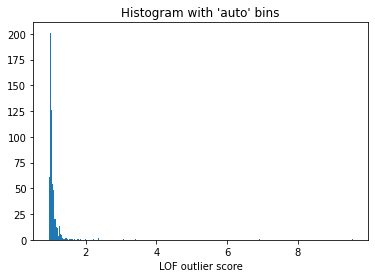

In [331]:
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('LOF outlier score')
plt.show()

In [332]:
threshold = lof.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Anomaly_Score
0,Normal,1115,95.462329,739.91,56.75,69.61,9653.92,1970.59,1984.50,98.98,...,91.47,44.89,22.76,2.43,13.38,1.70,12.63,6.39,2007.81,1.04
1,Outlier,53,4.537671,760.74,59.53,83.45,32427.70,1970.81,1985.68,202.81,...,181.34,69.43,25.04,3.40,49.64,29.32,457.55,6.38,2007.96,2.16


In [333]:
Actual_pred = pd.DataFrame({'Actual': y_test, 'Anomaly_Score': y_test_scores})
Actual_pred['Pred'] = np.where(Actual_pred['Anomaly_Score']< threshold,0,1)
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
39300,1,0
52000,1,0
55000,1,1
60000,1,0
61000,1,0
...,...,...
466500,0,1
485000,1,0
538000,0,1


In [334]:
X_train = X_train.drop(["Anomaly_Score", "Group"], axis=1)

In [335]:
!pip install combo
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.lof import LOF
# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)

# Test a range of k-neighbors from 10 to 200. There will be 20 models.
n_clf = 20
k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 
 120, 130, 140, 150, 160, 170, 180, 190, 200]
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    lof = LOF(n_neighbors=k) 
    lof.fit(X_train_norm)

    # Store the results in each column:
    train_scores[:, i] = lof.decision_scores_
    test_scores[:, i] = lof.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


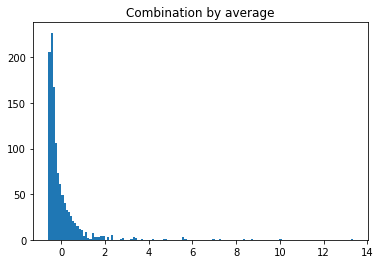

In [336]:
# Combination by average
# The test_scores_norm is 500 x 20. The "average" function will take the average of the 20 columns. The result "y_by_average" is a single column: 
y_by_average = average(train_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [337]:
descriptive_stat_threshold(X_train,y_by_average, .5)

,Group,Count,Count %,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Anomaly_Score
0,Normal,1018,87.157534,747.25,55.09,69.15,9494.02,1972.17,1984.72,95.82,...,90.58,42.20,20.70,0.12,12.08,0.00,13.34,6.35,2007.81,-0.25
1,Outlier,150,12.842466,697.45,69.00,77.64,18785.85,1959.98,1983.41,157.08,...,129.25,71.77,37.57,18.45,35.05,23.01,165.00,6.59,2007.87,1.72


Handling duplicates (if any)

In [338]:
#Checking for the presence of duplicates
new_df.duplicated().sum()

0

There are no duplicates in the dataset

Binning

In [339]:
#Grouping Year built into 4 groups: extremely old, very old, old, modern so 5 bins are needed 
min_value = new_df.YearBuilt.min()
max_value = new_df.YearBuilt.max()
print(min_value)
print(max_value)

1872
2010


In [340]:
#using linspace() to calculate the 5 needed bins
bins = np.linspace(min_value,max_value,5)
bins

array([1872. , 1906.5, 1941. , 1975.5, 2010. ])

In [341]:
#defining the labels
labels = ["Extremely old", "VeryOld","Old","Modern"]
#using cut() to convert numeric values into categorical value
new_df["binsYear"] = pd.cut(new_df["YearBuilt"], bins=bins, labels=labels, include_lowest=True)

<ipython-input-341-6a5989e58db6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["binsYear"] = pd.cut(new_df["YearBuilt"], bins=bins, labels=labels, include_lowest=True)


(array([702., 244., 486.,  28.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

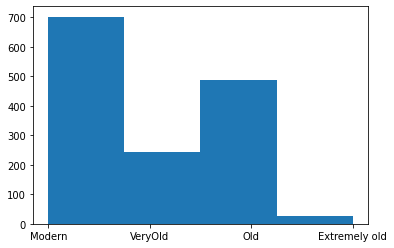

In [342]:
#Using histogram to Plot the distribution 
plt.hist(new_df["binsYear"], bins=4)

In [343]:
#Grouping GarageArea into 3 groups: small, medium, big 
min_value = new_df.GarageArea.min()
max_value = new_df.GarageArea.max()
print(min_value)
print(max_value)

0
1418


In [344]:
#using linspace() to calculate the needed bins
bins = np.linspace(min_value,max_value,4)
bins

array([   0.        ,  472.66666667,  945.33333333, 1418.        ])

In [345]:
#defining the labels
labels = ["small", "medium","big"]
#using cut() to convert numeric values into categorical values
new_df["bins_GarageArea"] = pd.cut(new_df["GarageArea"], bins=bins, labels=labels, include_lowest=True)

<ipython-input-345-6b6bd8d826ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["bins_GarageArea"] = pd.cut(new_df["GarageArea"], bins=bins, labels=labels, include_lowest=True)


In [348]:
#Grouping GrLivArea into 3 groups: small, medium, big 
min_value = new_df.GrLivArea.min()
max_value = new_df.GrLivArea.max()
print(min_value)
print(max_value)

334
5642


In [353]:
#using linspace() to calculate the needed bins
bins = np.linspace(min_value,max_value,4)
bins

array([ 334.        , 2103.33333333, 3872.66666667, 5642.        ])

In [354]:
#defining the labels
labels = ["small", "medium","big"]
#using cut() to convert numeric values into categorical values
new_df["bins_GrLivArea"] = pd.cut(new_df["GrLivArea"], bins=bins, labels=labels, include_lowest=True)

<ipython-input-354-4e31faa8c94f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["bins_GrLivArea"] = pd.cut(new_df["GrLivArea"], bins=bins, labels=labels, include_lowest=True)


Formatting

In [356]:
#Making data homogeneous by ending all continuous variables with same decimal number
float_columns = new_df.select_dtypes(include=np.number).columns.tolist()
new_df[float_columns] = new_df[float_columns].astype(float)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [357]:
#checking if all continuous features end with a decimal point
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,binsYear,bins_GarageArea,bins_GrLivArea
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,Modern,medium,small
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,Modern,small,small
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,Modern,medium,small
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0,VeryOld,medium,small
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,Modern,medium,medium


Normalization

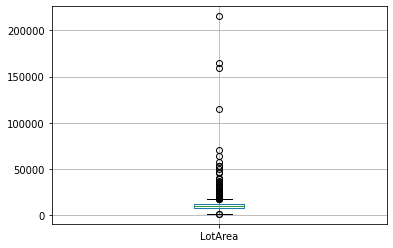

In [358]:
#Normalizing lot area using clipping
#Looking at distribution of lot area first
new_df.boxplot(column = "LotArea")


In [359]:
vmax = 80000
vmin = 1500
new_df["LotArea"] = new_df["LotArea"].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)

<ipython-input-359-78c98ff0a4ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["LotArea"] = new_df["LotArea"].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)


In [360]:
#checking
new_df.LotArea

0        8450.0
1        9600.0
2       11250.0
3        9550.0
4       14260.0
         ...   
1455     7917.0
1456    13175.0
1457     9042.0
1458     9717.0
1459     9937.0
Name: LotArea, Length: 1460, dtype: float64

In [361]:
#Normalizing 1stFlrSF using clipping
vmax = 2800
vmin = 1000
new_df["1stFlrSF"] = new_df["1stFlrSF"].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)

<ipython-input-361-af760032d127>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["1stFlrSF"] = new_df["1stFlrSF"].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)


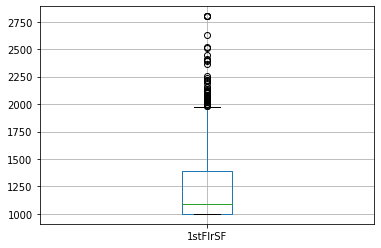

In [362]:
new_df.boxplot(column="1stFlrSF")

Standardization

In [363]:
#standardizing sale price and lot area
#sale price
from scipy.stats import zscore
new_df["zscore-LotArea"] = zscore(new_df["LotArea"])

In [364]:
new_df["zscore-SalePrice"] = zscore(new_df["SalePrice"])

In [365]:
#checking the results
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,binsYear,bins_GarageArea,bins_GrLivArea,zscore-LotArea,zscore-SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,2.0,2008.0,WD,Normal,208500.0,Modern,medium,small,-0.273571,0.347273
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,5.0,2007.0,WD,Normal,181500.0,Modern,small,small,-0.102420,0.007288
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,9.0,2008.0,WD,Normal,223500.0,Modern,medium,small,0.143144,0.536154
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,2.0,2006.0,WD,Abnorml,140000.0,VeryOld,medium,small,-0.109861,-0.515281
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,12.0,2008.0,WD,Normal,250000.0,Modern,medium,medium,0.591113,0.869843


Encoding categorical variables

In [366]:
# encoding for all categorical features
#Using label encoding to encode ExterQual
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#First converting ExterQual into category 
new_df["ExterQual"] = new_df["ExterQual"].astype("category")
dict_enco = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}
new_df["ExterQual_Coded"] = new_df["ExterQual"].map(dict_enco)



In [367]:
#For ExterCond
new_df["ExterCond"] = new_df["ExterCond"].astype("category")
dict_enco = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}
new_df["ExterCond_Coded"] = new_df["ExterCond"].map(dict_enco)

In [368]:
#For BsmtQual
new_df["BsmtQual"] = new_df["BsmtQual"].astype("category")
dict_enco = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "Na":0}
new_df["BsmtQual_Coded"] = new_df["BsmtQual"].map(dict_enco)

In [369]:
#For BsmtCond
new_df["BsmtCond"] = new_df["BsmtCond"].astype("category")
dict_enco = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "Na":0}
new_df["BsmtCond_Coded"] = new_df["BsmtCond"].map(dict_enco)

In [370]:
#For BsmtExposure
new_df["BsmtExposure"] = new_df["BsmtExposure"].astype("category")
dict_enco = {"Gd":4, "Av":3, "Mn":2, "No":1, "NA":0}
new_df["BsmtExposure_Coded"] = new_df["BsmtExposure"].map(dict_enco)

In [371]:
#For MSZoning
new_df["MSZoning"] = new_df["MSZoning"].astype("category")
new_df["MSZoning_coded"] = new_df["MSZoning"].cat.codes

In [375]:
#For Street
new_df["Street"] = new_df["Street"].astype("category")
new_df["Street_coded"] = new_df["Street"].cat.codes

In [374]:
#For LotShape
new_df["LotShape"] = new_df["LotShape"].astype("category")
new_df["LotShape_coded"] = new_df["LotShape"].cat.codes

In [373]:
#For LandContour
new_df["LandContour"] = new_df["LandContour"].astype("category")
new_df["LandContour_coded"] = new_df["LandContour"].cat.codes

In [372]:
#checking
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,bins_GarageArea,bins_GrLivArea,zscore-LotArea,zscore-SalePrice,ExterQual_Coded,ExterCond_Coded,BsmtQual_Coded,BsmtCond_Coded,BsmtExposure_Coded,MSZoning_coded
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,medium,small,-0.273571,0.347273,4,3,4,3,1,3
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,small,small,-0.102420,0.007288,3,3,4,3,4,3
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,medium,small,0.143144,0.536154,4,3,4,3,2,3
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,medium,small,-0.109861,-0.515281,3,3,3,4,1,3
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,medium,medium,0.591113,0.869843,4,3,4,3,3,3


Post Processing

Collinearity

In [376]:
#calculating correlation
coll = new_df.select_dtypes(include=np.number)
coll
coll.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscVal,MoSold,YrSold,SalePrice,zscore-LotArea,zscore-SalePrice,MSZoning_coded,LandContour_coded,LotShape_coded,Street_coded
Id,1.000000,0.011156,-0.009601,-0.018244,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.006242,0.021172,0.000712,-0.021917,-0.018244,-0.021917,-0.006096,-0.019659,0.032122,0.008916
MSSubClass,0.011156,1.000000,-0.357056,-0.218206,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.007683,-0.013585,-0.021407,-0.084284,-0.218206,-0.084284,0.035900,-0.002940,0.119289,-0.024969
LotFrontage,-0.009601,-0.357056,1.000000,0.405468,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.001168,0.010158,0.006768,0.334901,0.405468,0.334901,-0.106363,-0.075647,-0.144931,-0.037323
LotArea,-0.018244,-0.218206,0.405468,1.000000,0.153237,-0.012989,0.029358,0.030824,0.145900,0.268159,...,0.039214,-0.000553,-0.027501,0.337664,1.000000,0.337664,-0.049573,-0.171757,-0.226348,-0.160023
OverallQual,-0.028365,0.032628,0.234196,0.153237,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.031406,0.070815,-0.027347,0.790982,0.153237,0.790982,-0.160099,0.028907,-0.190497,0.058823
OverallCond,0.012609,-0.059316,-0.052820,-0.012989,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,0.068777,-0.003511,0.043950,-0.077856,-0.012989,-0.077856,0.186951,-0.045271,0.013693,0.042848
YearBuilt,-0.012713,0.027850,0.117598,0.029358,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,-0.034383,0.012398,-0.013618,0.522897,0.029358,0.522897,-0.308908,0.161622,-0.226062,0.021137
YearRemodAdd,-0.021998,0.040581,0.082746,0.030824,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,-0.010286,0.021490,0.035743,0.507101,0.030824,0.507101,-0.174728,0.093374,-0.153825,0.065465
MasVnrArea,-0.050199,0.022895,0.179283,0.145900,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,-0.029815,-0.005940,-0.008184,0.475241,0.145900,0.475241,-0.066766,0.049308,-0.105586,0.017326
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.268159,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.003571,-0.015727,0.014359,0.386420,0.268159,0.386420,-0.049128,-0.018097,-0.134033,-0.015643


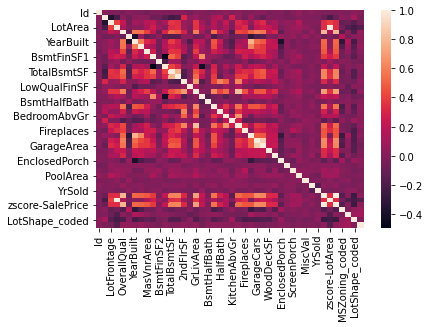

In [380]:
#creating heatmap to visualize the correlation
sns.heatmap(coll.corr())


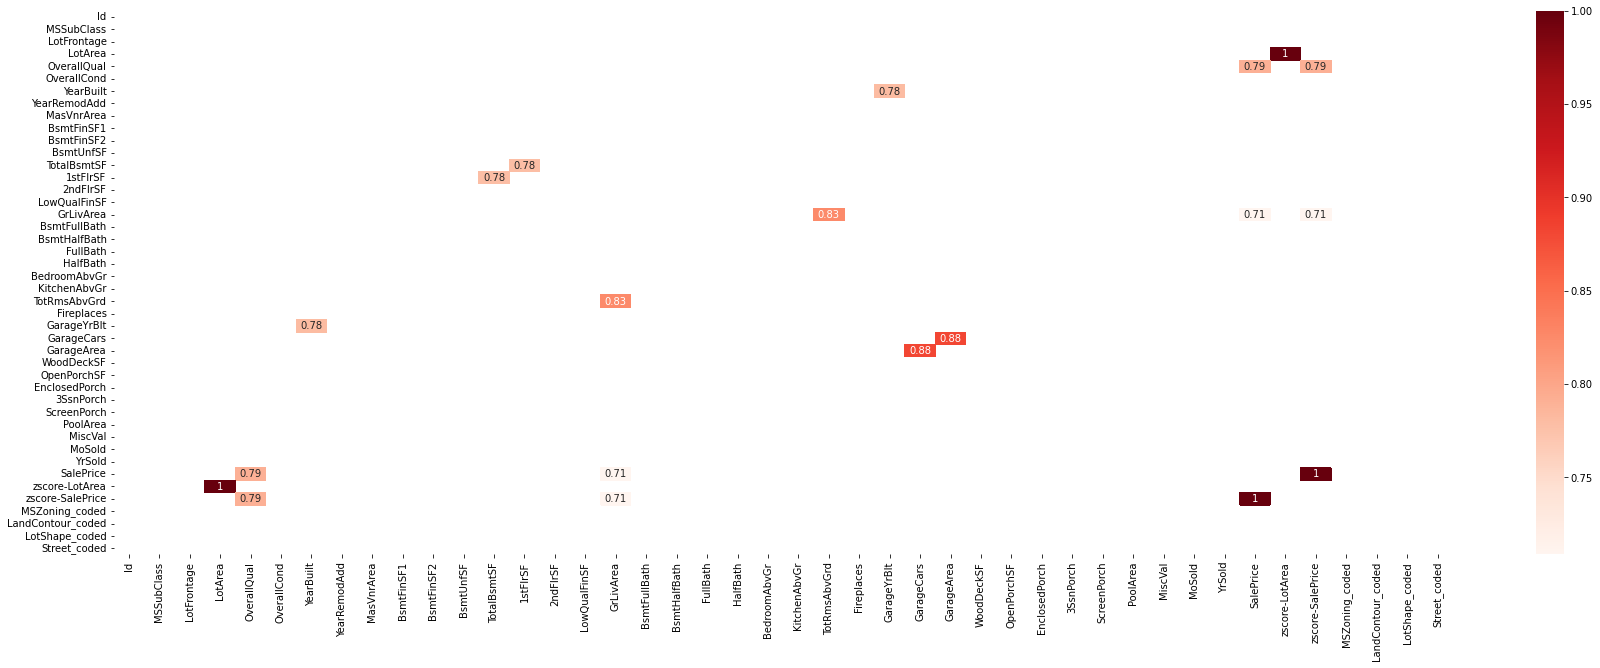

In [379]:
#Filtering the heatmap to see the independent variables that exhibit multicollinearity
Corrdf = coll.corr()
filteredDf = Corrdf[((Corrdf >= .7) | (Corrdf <= -.7)) & (Corrdf !=1)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [378]:
#To view the presence of multicollinearity better, a function can be created
def multicorr(a: pd.DataFrame, bound: float):
    aCorr = a.corr()
    xFiltered = aCorr[((aCorr >= bound) | (aCorr <= -bound)) & (aCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened
#using the function
multicorr(coll, .7)

GrLivArea         SalePrice           0.708624
                  zscore-SalePrice    0.708624
TotalBsmtSF       1stFlrSF            0.779069
YearBuilt         GarageYrBlt         0.780555
OverallQual       SalePrice           0.790982
                  zscore-SalePrice    0.790982
TotRmsAbvGrd      GrLivArea           0.825489
GarageCars        GarageArea          0.882475
zscore-SalePrice  SalePrice           1.000000
zscore-LotArea    LotArea             1.000000
Id                Id                       NaN
dtype: float64

From the above, the pairs GarageYrBlt and YearBuilt columns, TotalBsmtSF and 1stFlrSF, TotRmsAbvGrd and GrLivArea, GarageCars and GarageArea, exhibit multicollinearity as the correlation between the pairs is 0.78, 0.82, 0.83, and 0.88 respectively. Therefore some of these columns can be dropped to be able to predict sales price with fewer dimensions.




Identification of features to be dropped (feature selection)


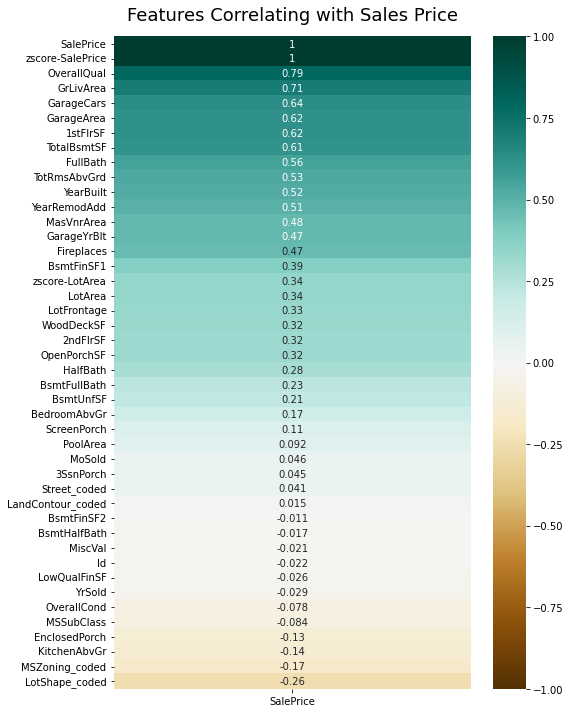

In [377]:
#To select the independent features to retain from those that exhibited multicollinearity. We can compare how they correlate with the target feature salesprice by sorting the correlation based on sales price.
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(coll.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

From the above, the features that need to be dropped are **GarageYrBlt, TotRmsAbvGrd, and GarageArea** because they're the ones that are least correlated with the target feature compared to the respective features with which they exhibited multicollinearity. For the case of TotalBsmtSF and 1stFlrSF, they both have a correlation of 0.61 with sales price so either one can be dropped. In this case, **TotalBsmtSF** can be dropped since, rationally,  the square footage of the 1st floor might be the one that impacts the price the most.